# Solar Energy Power Generation Prediction Project

## 1. Project Setup and Data Loading ⚙️

This section handles the initial setup, including installing necessary libraries, downloading the dataset from KaggleHub, and loading the data into a pandas DataFrame.

### 1.1 Import KaggleHub and Download Dataset

The code below downloads the 'solar-energy-power-generation-dataset' and prints the local path where it's saved.

In [5]:
import kagglehub
dataset_path = kagglehub.dataset_download('stucom/solar-energy-power-generation-dataset')
print(dataset_path)

Using Colab cache for faster access to the 'solar-energy-power-generation-dataset' dataset.
/kaggle/input/solar-energy-power-generation-dataset


### 1.2 Import Essential Libraries
Importing standard libraries for data manipulation, visualization, and warning control.

In [20]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

### 1.3 Load the Dataset
Reading the csv file into a pandas DataFrame named df.

Displaying the first few rows of the DataFrame to understand the column names and data structure.

In [21]:
df=pd.read_csv('/kaggle/input/solar-energy-power-generation-dataset/spg.csv')

In [22]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


## 2. Exploratory Data Analysis (EDA) and Preprocessing 🧹
This section focuses on cleaning the dataset, checking for missing values or duplicates, and preparing the features for model training.

### 2.1 Feature Selection: Dropping Redundant Columns
Columns related to wind speed and direction at higher altitudes (80_m and 900_mb) are dropped, likely to simplify the model or because they were deemed less relevant than ground-level features.

In [23]:
df = df.drop(columns=["wind_speed_900_mb", "wind_direction_900_mb", "wind_speed_80_m_above_gnd", "wind_direction_80_m_above_gnd"], axis=1)

In [24]:
df.shape

(4213, 17)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2_m_above_gnd,4213.0,15.068111,8.853677,-5.350000,8.390000,14.750000,21.290000,34.90000
relative_humidity_2_m_above_gnd,4213.0,51.361025,23.525864,7.000000,32.000000,48.000000,70.000000,100.00000
mean_sea_level_pressure_MSL,4213.0,1019.337812,7.022867,997.500000,1014.500000,1018.100000,1023.600000,1046.80000
total_precipitation_sfc,4213.0,0.031759,0.170212,0.000000,0.000000,0.000000,0.000000,3.20000
snowfall_amount_sfc,4213.0,0.002808,0.038015,0.000000,0.000000,0.000000,0.000000,1.68000
total_cloud_cover_sfc,4213.0,34.056990,42.843638,0.000000,0.000000,8.700000,100.000000,100.00000
high_cloud_cover_high_cld_lay,4213.0,14.458818,30.711707,0.000000,0.000000,0.000000,9.000000,100.00000
medium_cloud_cover_mid_cld_lay,4213.0,20.023499,36.387948,0.000000,0.000000,0.000000,10.000000,100.00000
low_cloud_cover_low_cld_lay,4213.0,21.373368,38.013885,0.000000,0.000000,0.000000,10.000000,100.00000
shortwave_radiation_backwards_sfc,4213.0,387.759036,278.459293,0.000000,142.400000,381.810000,599.860000,952.30000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [27]:
df.isnull().sum()

,0
temperature_2_m_above_gnd,0
relative_humidity_2_m_above_gnd,0
mean_sea_level_pressure_MSL,0
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,0


In [28]:
df.duplicated().sum()

np.int64(0)

### 2.2 Outlier Visualization (Box Plots)
Creating box plots for all numerical features to visualize their distributions and identify potential outliers.

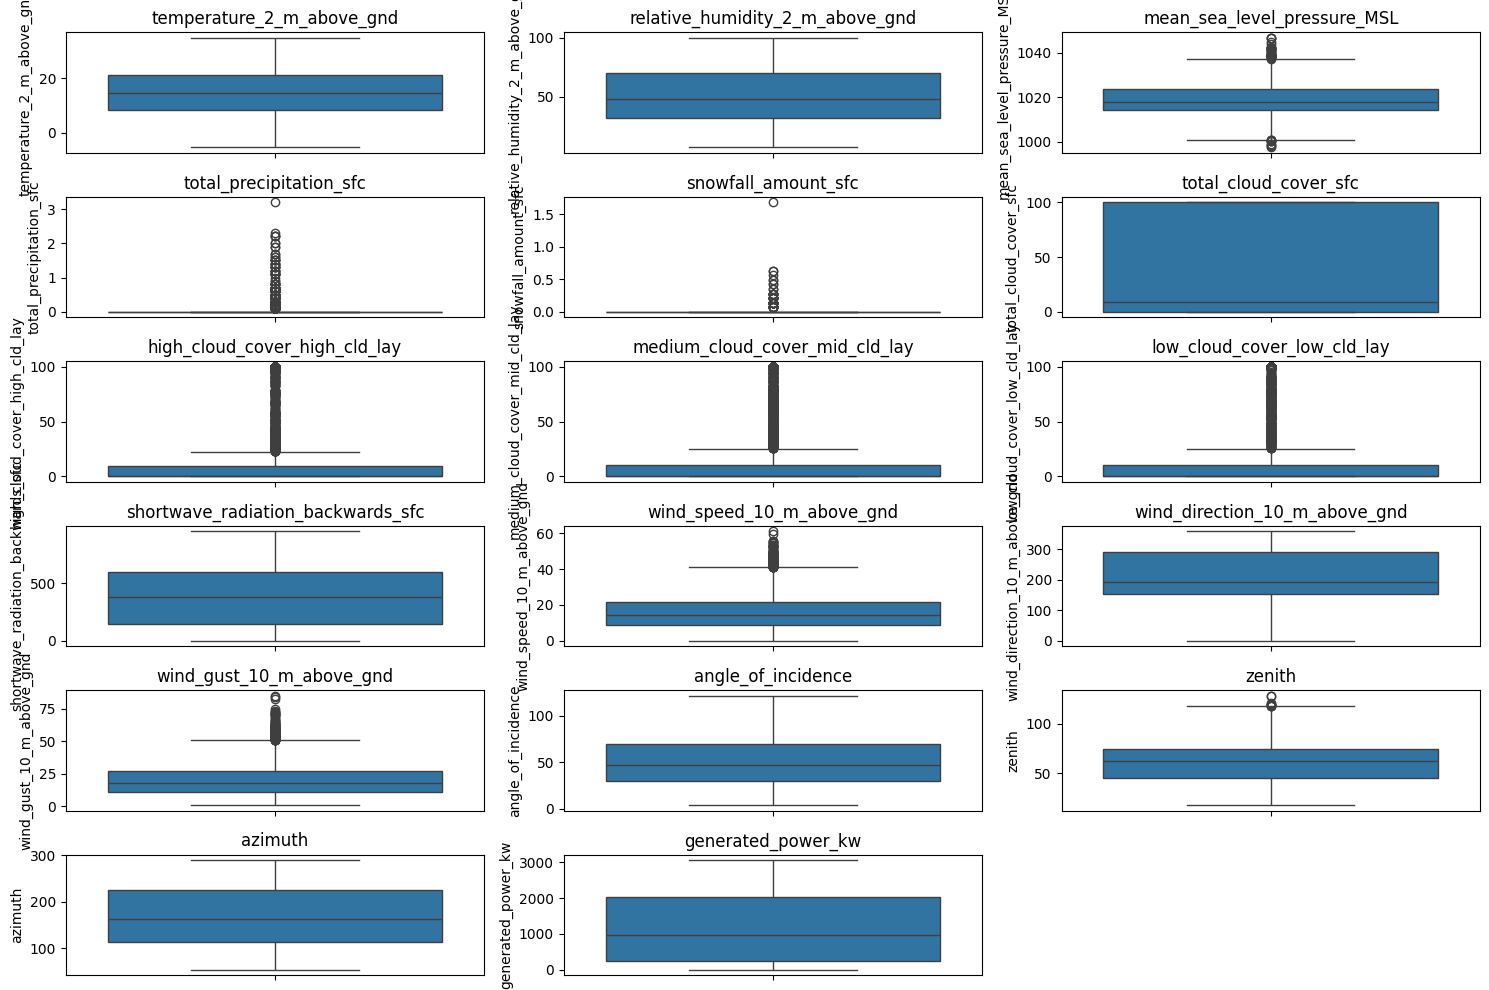

In [29]:
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns # Import seaborn for boxplot

import math



# Calculate the number of rows and columns for subplots

num_cols = len(df.select_dtypes(include=np.number).columns)

num_rows = math.ceil(num_cols / 3)  # Calculate rows, rounding up



# Create box plots for all numerical features to visualize outliers

plt.figure(figsize=(15, 10))

for i, col in enumerate(df.select_dtypes(include=np.number).columns):

    plt.subplot(num_rows, 3, i + 1) # Adjusted subplot grid

    sns.boxplot(data=df, y=col) # Use sns.boxplot

    plt.title(col)

plt.tight_layout()

plt.show()

### 2.3 Feature Correlation Analysis (Heatmap)
Visualizing the correlation matrix to understand the linear relationships between all features and the target variable, generated_power_kw.

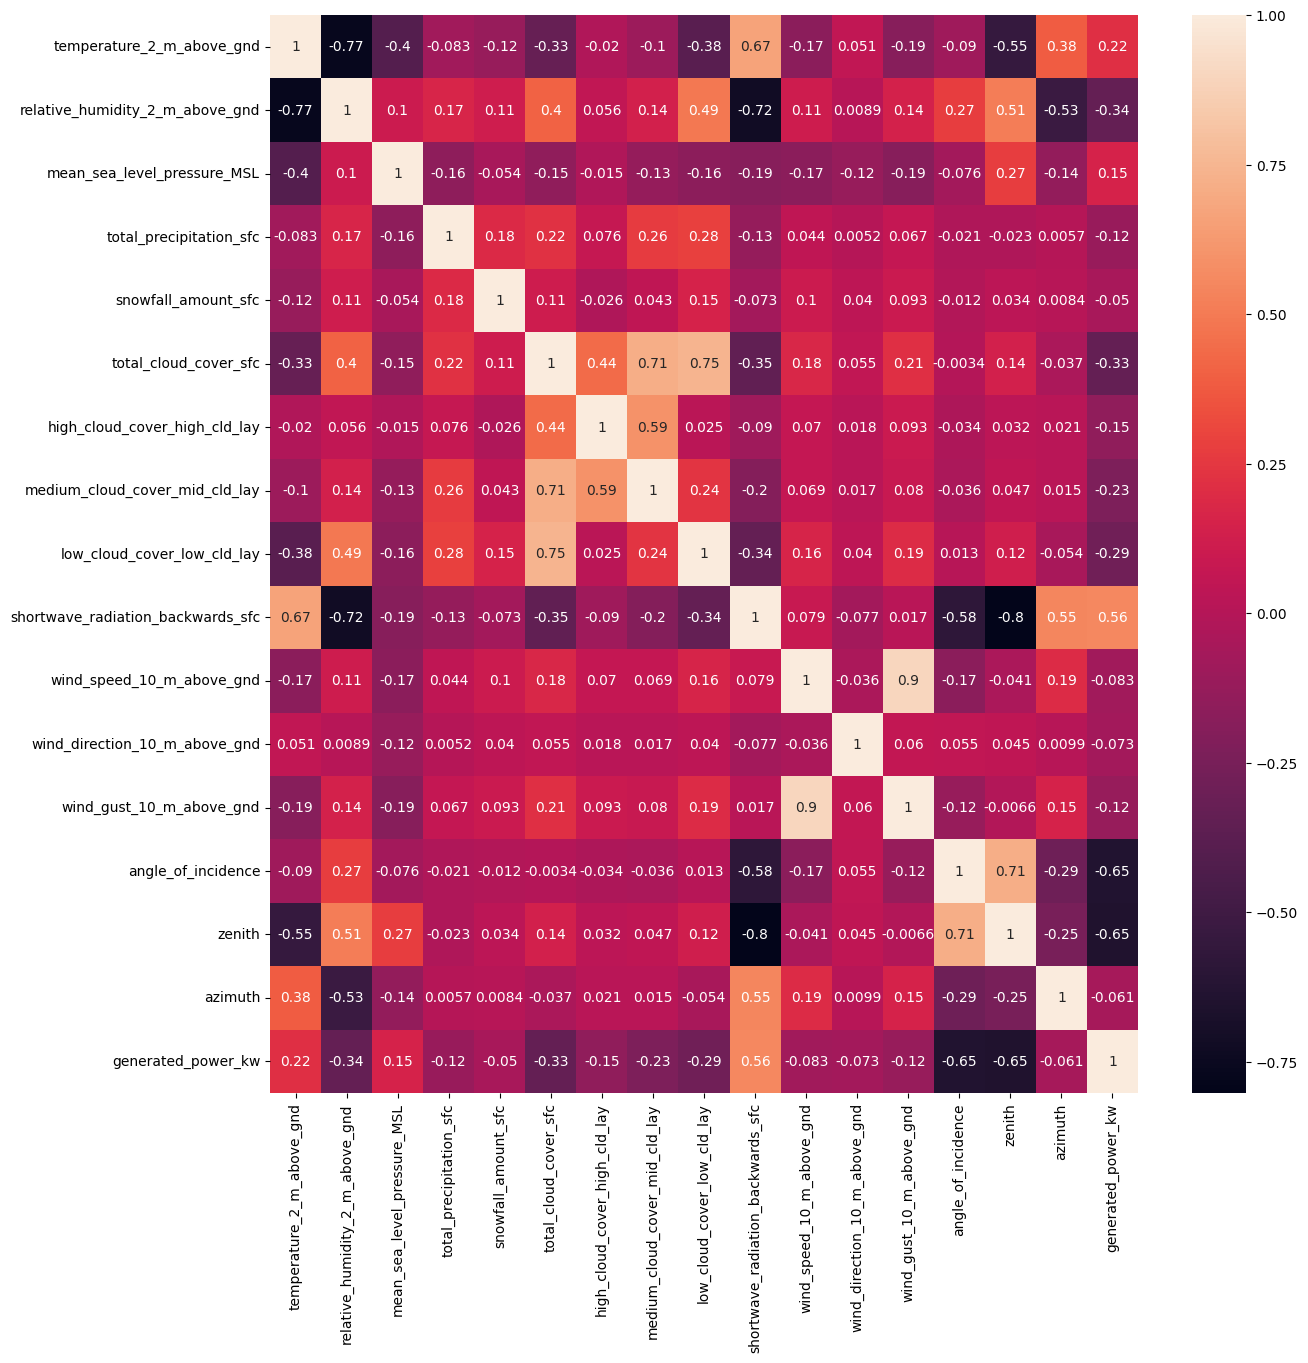

In [30]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True)
plt.show()

## 3. Data Scaling and Splitting 📐

In [31]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,6.37,312.71,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,5.15,294.78,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,4.68,270.00,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,3.60,323.13,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,6.21,10.01,16.56,19.199908,63.795208,182.13526,2640.20340


In [32]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

scaler=StandardScaler()

x=df.drop('generated_power_kw',axis=1)

x=scaler.fit_transform(x)

y=df['generated_power_kw']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,6.37,312.71,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,5.15,294.78,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,4.68,270.00,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,3.60,323.13,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,6.21,10.01,16.56,19.199908,63.795208,182.13526,2640.20340


## 4. Model Training and Initial Evaluation ⚙️

In [41]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.9 MB/s eta 0:00:00


### 4.2 Initialize and Evaluate Multiple Models
A dictionary of various regression models is created, and a loop is used to train each one, make predictions, and print the evaluation metrics.

Metric	Description :

MSE	Mean Squared Error : Measures the average squared difference between the estimated values and the actual value. Lower is better.

R2 :  R-squared (Coefficient of Determination). Represents the proportion of the variance for a dependent variable that's explained by the independent variables. Closer to 1.0 is better.

In [42]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.linear_model import ElasticNet

from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

from catboost import CatBoostRegressor


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "Elastic Net Regression": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "SVR": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

for name, model in models.items():
    model.fit(x_train, y_train)

    # Predictions
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    # Metrics - Test
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Metrics - Train
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f"{name}")
    print(f"  🔹 Test  -> MSE: {mse_test:.4f}, R²: {r2_test:.4f}")
    print(f"  🔹 Train -> MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
    print("-" * 60)


Linear Regression
  🔹 Test  -> MSE: 255978.4287, R²: 0.7198
  🔹 Train -> MSE: 259735.9662, R²: 0.7018
------------------------------------------------------------
Ridge Regression
  🔹 Test  -> MSE: 255962.9021, R²: 0.7198
  🔹 Train -> MSE: 259736.1080, R²: 0.7018
------------------------------------------------------------
Lasso Regression
  🔹 Test  -> MSE: 255647.6230, R²: 0.7201
  🔹 Train -> MSE: 259761.0179, R²: 0.7018
------------------------------------------------------------
Elastic Net Regression
  🔹 Test  -> MSE: 298610.1646, R²: 0.6731
  🔹 Train -> MSE: 306673.3258, R²: 0.6479
------------------------------------------------------------
Polynomial Regression
  🔹 Test  -> MSE: 2857003.9398, R²: -2.1277
  🔹 Train -> MSE: 181834.2611, R²: 0.7912
------------------------------------------------------------
SVR
  🔹 Test  -> MSE: 713354.3709, R²: 0.2191
  🔹 Train -> MSE: 687460.0470, R²: 0.2108
------------------------------------------------------------
Decision Tree
  🔹 Test  -> 

## 5. Hyperparameter Tuning (LightGBM/Gradient Boosting) ⚙️

In [2]:
# RandomForest
# Gradient Boosting
# lightGBM
from sklearn.model_selection import GridSearchCV

rf_model = GradientBoostingRegressor(random_state=42)
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.0001, 0.1, 0.01],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'loss': ["squared_error", "absolute_error", "huber", "quantile"],
    'max_features': ['sqrt', 'log2']
}
gcv = GridSearchCV(estimator=rf_model, param_grid=params, n_jobs=-1)

gcv.fit(x_train, y_train)

print(gcv.best_params_)

# rf_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', min_samples_split=2, max_depth=None, max_features='sqrt', n_jobs=-1, random_state=42)

# rf_model.fit(x_train, y_train)

# y_pred_test = rf_model.predict(x_test)
# y_pred_train = rf_model.predict(x_train)

In [3]:
rf_model = LGBMRegressor(random_state=42)
params = {
    'boosting_type ': ['gbdt', 'dart', 'rf'],
    'n_estimators': [50, 80, 100, 150, 200],
    'max_depth': [8, 10, 12, 15, 20],
    'learning_rate': [0.001, 0.1, 0.01, 0.9]
}
gcv = GridSearchCV(estimator=rf_model, param_grid=params, n_jobs=-1, verbose=2)

gcv.fit(x_train, y_train)

print(gcv.best_params_)

In [43]:
models = {
    "Random Forest": GradientBoostingRegressor(n_estimators=100, learning_rate=0.09, random_state=42),
}

for name, model in models.items():
    model.fit(x_train, y_train)

    # Predictions
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    # Metrics - Test
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Metrics - Train
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f"{name}")
    print(f"  🔹 Test  -> MSE: {mse_test:.4f}, R²: {r2_test:.4f}")
    print(f"  🔹 Train -> MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
    print("-" * 60)


Random Forest
  🔹 Test  -> MSE: 182280.0838, R²: 0.8005
  🔹 Train -> MSE: 149750.9835, R²: 0.8281
------------------------------------------------------------


In [44]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.09, random_state=42)
model.fit(x_train, y_train)
# Predictions
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
# Metrics - Test
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
# Metrics - Train
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"{name}")
print(f"  🔹 Test  -> MSE: {mse_test:.4f}, R²: {r2_test:.4f}")
print(f"  🔹 Train -> MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
print("-" * 60)

Random Forest
  🔹 Test  -> MSE: 182280.0838, R²: 0.8005
  🔹 Train -> MSE: 149750.9835, R²: 0.8281
------------------------------------------------------------


## 6. Model Persistence 💾

The final trained model (Gradient Boosting Regressor) and the fitted data StandardScaler are saved using joblib for later deployment and prediction on new, unseen data

In [45]:
import joblib

In [46]:
joblib.dump(model, "solar_power_prediction_model.pkl")

['solar_power_prediction_model.pkl']

In [47]:
joblib.dump(scaler, "standardscaler.pkl")

['standardscaler.pkl']

## Conclusion
The Gradient Boosting Regressor model with a test R2 of 0.8005 was selected as the final model and saved along with the fitted data scaler. This model can now be loaded for making solar power generation predictions in a production environment.